In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
# for Box-Cox Transformation
from scipy import stats
import pyhere


In [53]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [54]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [55]:
df_transformed = pd.read_csv(dir_data_external/"transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_TQV_2009,summer_TQV_2010,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,10.276667,11.860000,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,11.420000,15.633333,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,15.133333,20.490000,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,7.64,7.52,25.69,25.84,3.73,3.92,7.473333,7.320000,...,13.583333,13.333333,4.860000,5.136667,7.556667,7.200000,37.370000,39.736667,2.743333,2.893333
34932,-12.8167,28.2000,7.64,7.52,26.15,26.34,3.70,3.84,7.473333,7.320000,...,13.686667,13.470000,4.830000,5.046667,7.556667,7.200000,38.013333,40.570000,2.736667,2.853333
34933,-17.9167,25.8500,8.51,8.36,24.16,25.07,3.73,3.80,8.723333,8.663333,...,13.550000,11.703333,4.096667,4.323333,8.820000,8.360000,35.923333,38.716667,3.340000,3.320000


In [56]:
df_transformed.columns

Index(['latitude', 'longitude', 'ANN_CLRSKY_SFC_SW_DNI_2009',
       'ANN_CLRSKY_SFC_SW_DNI_2010', 'ANN_TQV_2009', 'ANN_TQV_2010',
       'ANN_WS10M_2009', 'ANN_WS10M_2010', 'autumn_CLRSKY_SFC_SW_DNI_2009',
       'autumn_CLRSKY_SFC_SW_DNI_2010', 'autumn_TQV_2009', 'autumn_TQV_2010',
       'autumn_WS10M_2009', 'autumn_WS10M_2010',
       'spring_CLRSKY_SFC_SW_DNI_2009', 'spring_CLRSKY_SFC_SW_DNI_2010',
       'spring_TQV_2009', 'spring_TQV_2010', 'spring_WS10M_2009',
       'spring_WS10M_2010', 'summer_CLRSKY_SFC_SW_DNI_2009',
       'summer_CLRSKY_SFC_SW_DNI_2010', 'summer_TQV_2009', 'summer_TQV_2010',
       'summer_WS10M_2009', 'summer_WS10M_2010',
       'winter_CLRSKY_SFC_SW_DNI_2009', 'winter_CLRSKY_SFC_SW_DNI_2010',
       'winter_TQV_2009', 'winter_TQV_2010', 'winter_WS10M_2009',
       'winter_WS10M_2010'],
      dtype='object')

In [57]:
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
csv_power_plants


,capacity_mw,latitude,longitude,primary_fuel_transformed
index,,,,
0,33.0,32.3220,65.1190,Other
1,10.0,31.6700,65.7950,Solar
2,10.0,31.6230,65.7920,Solar
3,66.0,34.5560,69.4787,Other
4,100.0,34.6410,69.7170,Other
...,...,...,...,...
34931,50.0,-12.9667,28.6333,Other
34932,20.0,-12.8167,28.2000,Other
34933,108.0,-17.9167,25.8500,Other


In [58]:
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")

In [59]:
df_transformed_combined

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010,capacity_mw,primary_fuel_transformed
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333,33.0,Other
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.0,Solar
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.0,Solar
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667,66.0,Other
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333,100.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,7.64,7.52,25.69,25.84,3.73,3.92,7.473333,7.320000,...,4.860000,5.136667,7.556667,7.200000,37.370000,39.736667,2.743333,2.893333,50.0,Other
34932,-12.8167,28.2000,7.64,7.52,26.15,26.34,3.70,3.84,7.473333,7.320000,...,4.830000,5.046667,7.556667,7.200000,38.013333,40.570000,2.736667,2.853333,20.0,Other
34933,-17.9167,25.8500,8.51,8.36,24.16,25.07,3.73,3.80,8.723333,8.663333,...,4.096667,4.323333,8.820000,8.360000,35.923333,38.716667,3.340000,3.320000,108.0,Other


primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

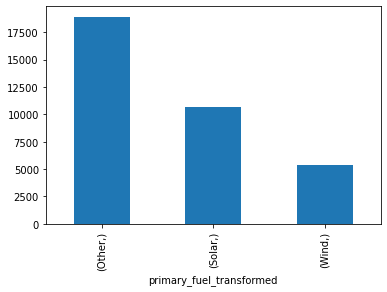

In [60]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [61]:
label_encoder = LabelEncoder()
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
df_transformed_combined.dropna(inplace = True)
df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


In [62]:
df_target_equivalent = df_transformed_combined[['primary_fuel_transformed', 'code_prim_fuel_transf']].drop_duplicates()
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
0,Other,0
1,Solar,1
91,Wind,2


## Balancing the data

In [65]:
index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(12000).index
index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(3000).index


In [66]:
df_transformed_combined.drop(index_rows_to_delete, axis = 0, inplace = True)
df_transformed_combined.drop(index_rows_to_delete_solar, axis = 0, inplace = True)

<AxesSubplot:xlabel='primary_fuel_transformed'>

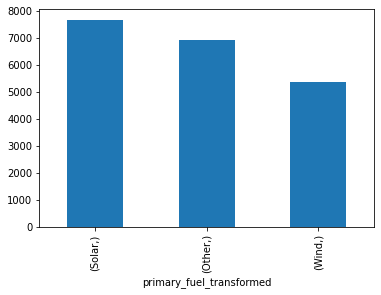

In [67]:
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [68]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)

pre_X = df_transformed_combined.drop(columns=['capacity_mw', 'latitude', 'longitude', 'primary_fuel_transformed'])
X = pre_X.drop(columns=['code_prim_fuel_transf'])
y = pre_X['code_prim_fuel_transf']

In [69]:
y

index
1        1
2        1
3        0
6        0
9        0
        ..
34922    0
34923    0
34926    0
34929    0
34931    0
Name: code_prim_fuel_transf, Length: 19926, dtype: int64

<AxesSubplot:xlabel='winter_TQV_2009', ylabel='Density'>

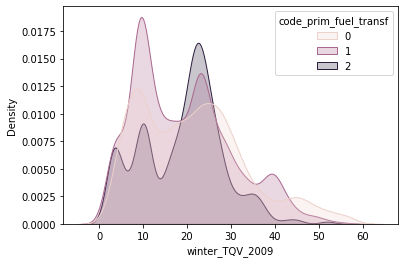

In [70]:
sns.kdeplot(data=pre_X, x='winter_TQV_2009', hue='code_prim_fuel_transf', shade=True)

In [71]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [72]:
def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [73]:
def get_accuracy_knn(n_neighbors, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [74]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

winter_TQV_2009                  0.396773
summer_TQV_2009                  0.384266
autumn_TQV_2010                  0.379378
winter_CLRSKY_SFC_SW_DNI_2010    0.365644
spring_CLRSKY_SFC_SW_DNI_2009    0.328370
spring_CLRSKY_SFC_SW_DNI_2010    0.303339
autumn_WS10M_2009                0.292668
winter_WS10M_2010                0.281885
summer_WS10M_2010                0.277263
ANN_WS10M_2010                   0.200735
Name: MI Scores, dtype: float64

In [75]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

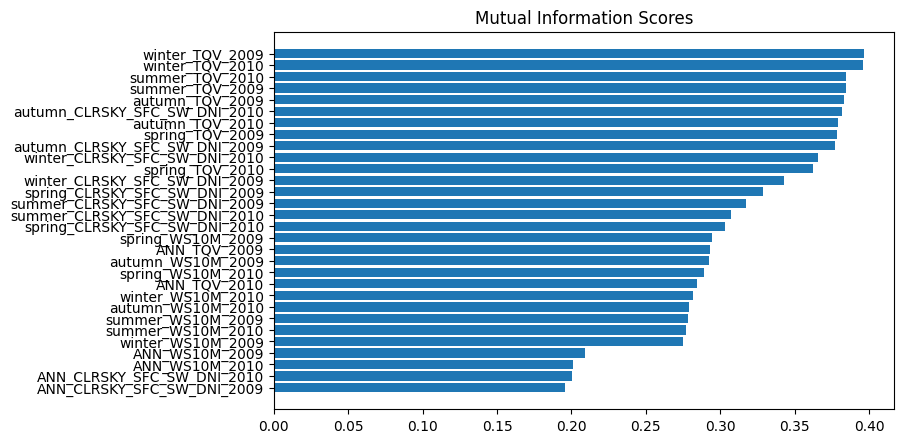

In [76]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [77]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

## DECISION TREE CLASSIFIER

1500


<AxesSubplot:>

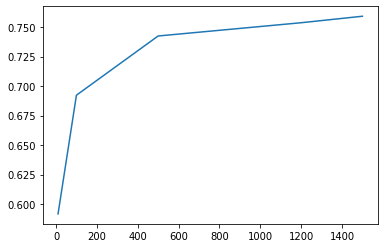

In [142]:
candidate_max_leaf_nodes = [10, 100, 500, 1200, 1500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [143]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)
y_pred = tree_model.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

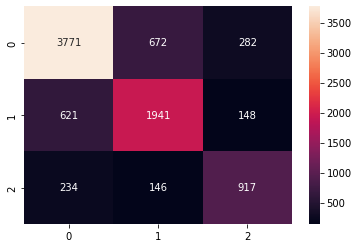

In [144]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [145]:
accuracy_score(val_y, y_pred)

0.7591617040769583

In [146]:
precision_score(val_y, y_pred, average='weighted')

0.7605578856804812

In [136]:
tree_model.score(val_X, val_y)

0.5663078332569857

In [30]:
# tree.plot_tree(tree_model)

# RANDOM FOREST CLASSIFIER

In [158]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50, 100, 500]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [100, 500, 1000, 1500]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [1000, 1500, 1700]

param_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [159]:
rf_model = RandomForestClassifier(random_state=0)
# rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose = 2, n_jobs=4)
rf_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 20, cv=5, verbose = 2, n_jobs=4)

In [ ]:
rf_grid.fit(train_X, train_y)

In [161]:
rf_grid.best_params_

{'n_estimators': 20,
 'min_samples_split': 100,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 1700,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [162]:
rf_grid.score(val_X, val_y)

0.7212551534585433

In [164]:
rf_model2 = RandomForestClassifier(bootstrap= False,
 max_depth= 50,
 max_features= 'log2',
 min_samples_leaf= 100,
 min_samples_split= 100,
 n_estimators= 20,
 max_leaf_nodes= 1700,
 random_state=0)
rf_model2.fit(train_X, train_y)
y_pred = rf_model2.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

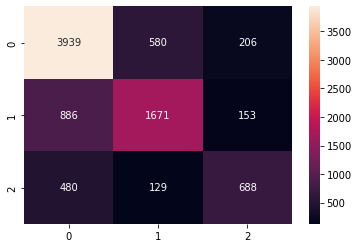

In [165]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [166]:
accuracy_score(val_y, y_pred)

0.7212551534585433

In [167]:
rf_model2.score(val_X, val_y)

0.7212551534585433

0    4725
1    2710
2    1297
Name: code_prim_fuel_transf, dtype: int64


<AxesSubplot:>

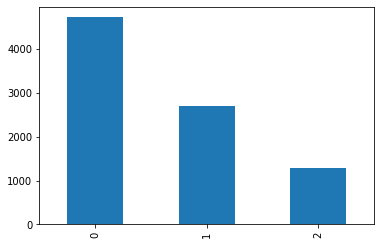

In [168]:
print(val_y.value_counts())
val_y.value_counts().plot.bar()

# XGBOOST

In [169]:
xgbclass_model_1 = XGBClassifier(random_state=0)
xgbclass_model_1.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [172]:
y_pred = xgbclass_model_1.predict(val_X)

In [174]:
xgbclass_model_1.score(val_X, val_y)

0.7715300045808521

<AxesSubplot:>

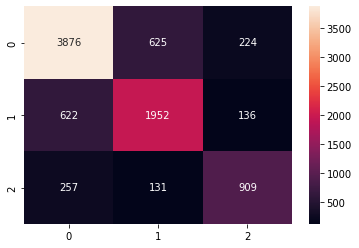

In [173]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [175]:
xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgbclass_model_2.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

/home/tomas/renewable_power_plants/renewable_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [176]:
y_pred = xgbclass_model_2.predict(val_X)

In [177]:
xgbclass_model_2.score(val_X, val_y)

0.7763398992212551

<AxesSubplot:>

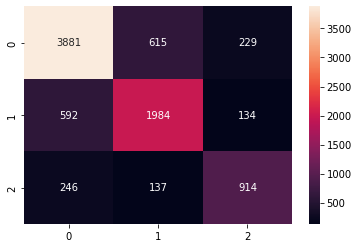

In [178]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# KNN

8


<AxesSubplot:>

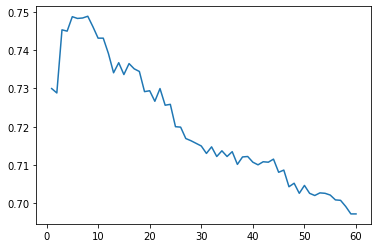

In [187]:
candidate_n_neighbors = np.arange(1,61)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X, val_X, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [188]:
knn_model_1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_1.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=8)

In [189]:
knn_model_1.score(val_X, val_y)

0.7488547869903802

In [78]:
# train_X_normalized = stats.boxcox(train_X)
x = train_X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='box-cox')
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
train_X_scaled = pd.DataFrame(x_scaled, index=train_X.index, columns=train_X.columns)

x = val_X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
val_X_scaled = pd.DataFrame(x_scaled, index=val_X.index, columns=val_X.columns)


In [91]:
train_X_scaled

,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,autumn_TQV_2009,autumn_TQV_2010,...,summer_TQV_2009,summer_TQV_2010,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010
index,,,,,,,,,,,,,,,,,,,,,
21156,-0.263488,-0.079092,-1.931955,-2.123356,0.014295,-0.070801,-2.205108,-2.267155,-1.762766,-1.841661,...,-0.251650,-0.272379,0.095252,-0.279920,-1.702906,-1.588999,-1.695087,-1.809261,0.384181,0.140234
3240,0.055356,-0.053791,1.144149,0.960751,-0.152455,-0.079571,-0.188722,-0.164517,0.550701,0.438860,...,1.135567,1.120112,-0.198280,-0.372336,-0.419023,-0.517622,0.579868,0.142289,0.045572,0.087252
16521,-0.431063,-0.495490,0.833654,0.928171,1.201255,1.432224,-0.547193,-0.582420,0.278722,0.301343,...,1.399955,1.396764,0.748947,0.837183,-0.174088,-0.403243,-0.566676,-0.486312,1.638985,1.664070
9056,-0.322158,-0.479028,0.938546,0.982887,-1.813190,-1.753791,-0.076150,-0.446399,0.403404,0.615674,...,1.252510,1.197570,-2.019707,-2.062992,-0.279196,-0.135135,-0.400098,-0.409767,-1.416040,-1.300953
19794,-1.773371,-1.374561,-0.319402,-0.542071,0.300733,0.112534,-0.862619,-0.666770,-0.196928,-0.875695,...,0.044059,0.040913,0.261976,0.206460,-1.511070,-0.831197,-0.516790,-0.765507,0.575926,0.307241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20760,0.500998,0.433500,-0.084501,-0.108582,-0.398614,-0.415669,0.786038,0.708059,0.002208,0.090480,...,-0.603051,-0.550052,-0.124166,0.203737,1.023707,1.067546,0.382456,0.382022,-0.676907,-0.736688
32113,0.458911,0.424845,-0.495353,-0.361829,-1.249147,-1.153568,0.891787,0.786898,0.030928,0.080719,...,-1.565842,-1.309837,-0.567541,-0.259836,0.423055,0.434269,0.499228,0.643192,-1.699981,-1.644362
30413,-0.297016,-0.062229,0.678507,0.579613,-0.899764,-0.986712,-0.029069,0.062975,0.993935,1.103623,...,-0.316831,-0.707619,-0.556563,-0.305811,-0.439555,-0.190202,1.381045,1.339619,-1.190667,-1.481049


In [92]:
def axis_calculation(total_columns_df, grid_columns):
    rows = int(total_columns_df / grid_columns)
    if( total_columns_df % grid_columns) > 0:
        rows += 1

    return (rows, grid_columns)
print(axis_calculation(30, 4))

(8, 4)


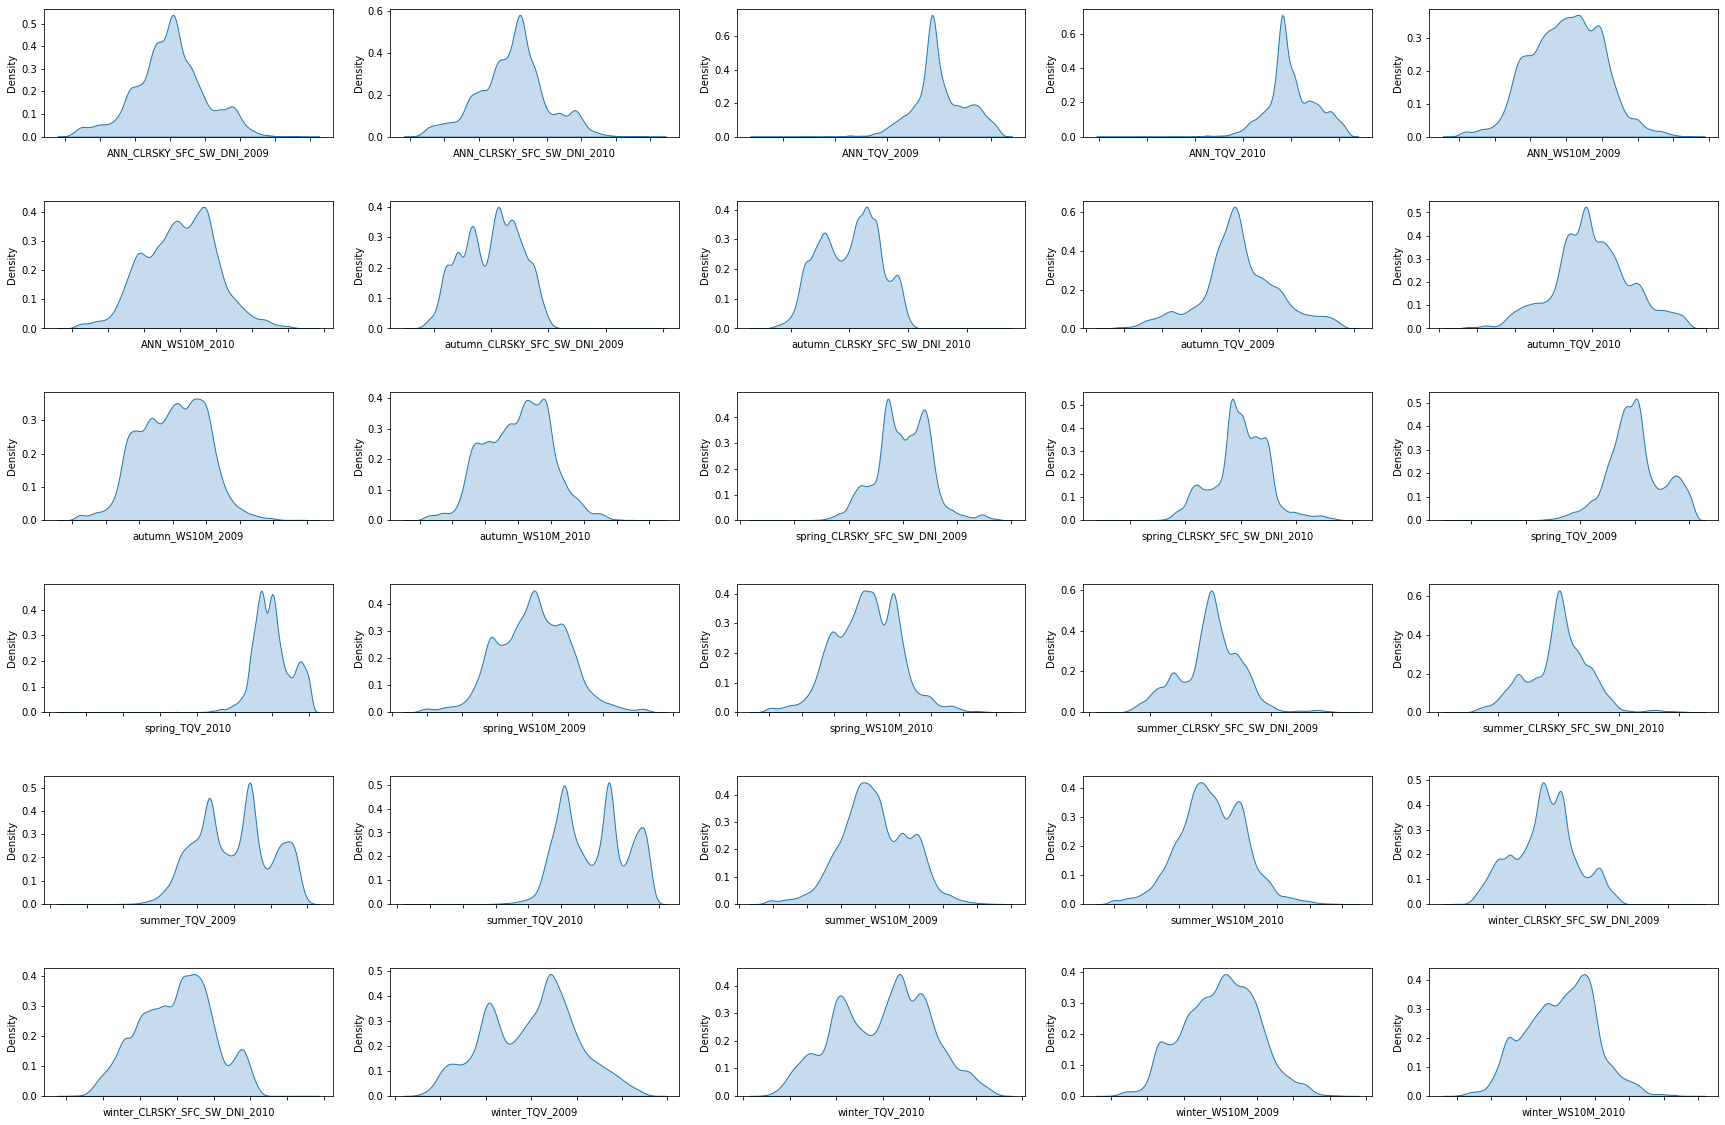

In [93]:

# plt.figure(figsize=(200,200))
grid_columns = 5
result_axis = axis_calculation(len(train_X_scaled.columns), grid_columns)
fig, axs = plt.subplots(result_axis[0],result_axis[1], figsize=(30,20))
fig.subplots_adjust(hspace=.5)

aux_cont = 0
aux_cont_2 = 0
# fig.figsize=(30,30)
for col in train_X_scaled.columns:
# #     # print(col)
    sns.kdeplot(data=train_X_scaled, x=col, shade=True, ax=axs[aux_cont_2, aux_cont] )
    # axs[aux_cont_2, aux_cont].set_xlabel('Participation Rate')
    # axs[aux_cont_2, aux_cont].set_ylabel('Frequency')
    # axs[aux_cont_2, aux_cont].set_title("sasa")
    axs[aux_cont_2, aux_cont].set_xticklabels([])
    aux_cont += 1
    if aux_cont >= grid_columns:
        aux_cont_2 +=1
        aux_cont = 0

array([[<AxesSubplot:title={'center':'ANN_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'ANN_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'ANN_TQV_2009'}>,
        <AxesSubplot:title={'center':'ANN_TQV_2010'}>,
        <AxesSubplot:title={'center':'ANN_WS10M_2009'}>],
       [<AxesSubplot:title={'center':'ANN_WS10M_2010'}>,
        <AxesSubplot:title={'center':'autumn_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'autumn_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'autumn_TQV_2009'}>,
        <AxesSubplot:title={'center':'autumn_TQV_2010'}>],
       [<AxesSubplot:title={'center':'autumn_WS10M_2009'}>,
        <AxesSubplot:title={'center':'autumn_WS10M_2010'}>,
        <AxesSubplot:title={'center':'spring_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'spring_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'spring_TQV_2009'}>],
       [<AxesSubplot:title={'center':'spring_TQV_2010

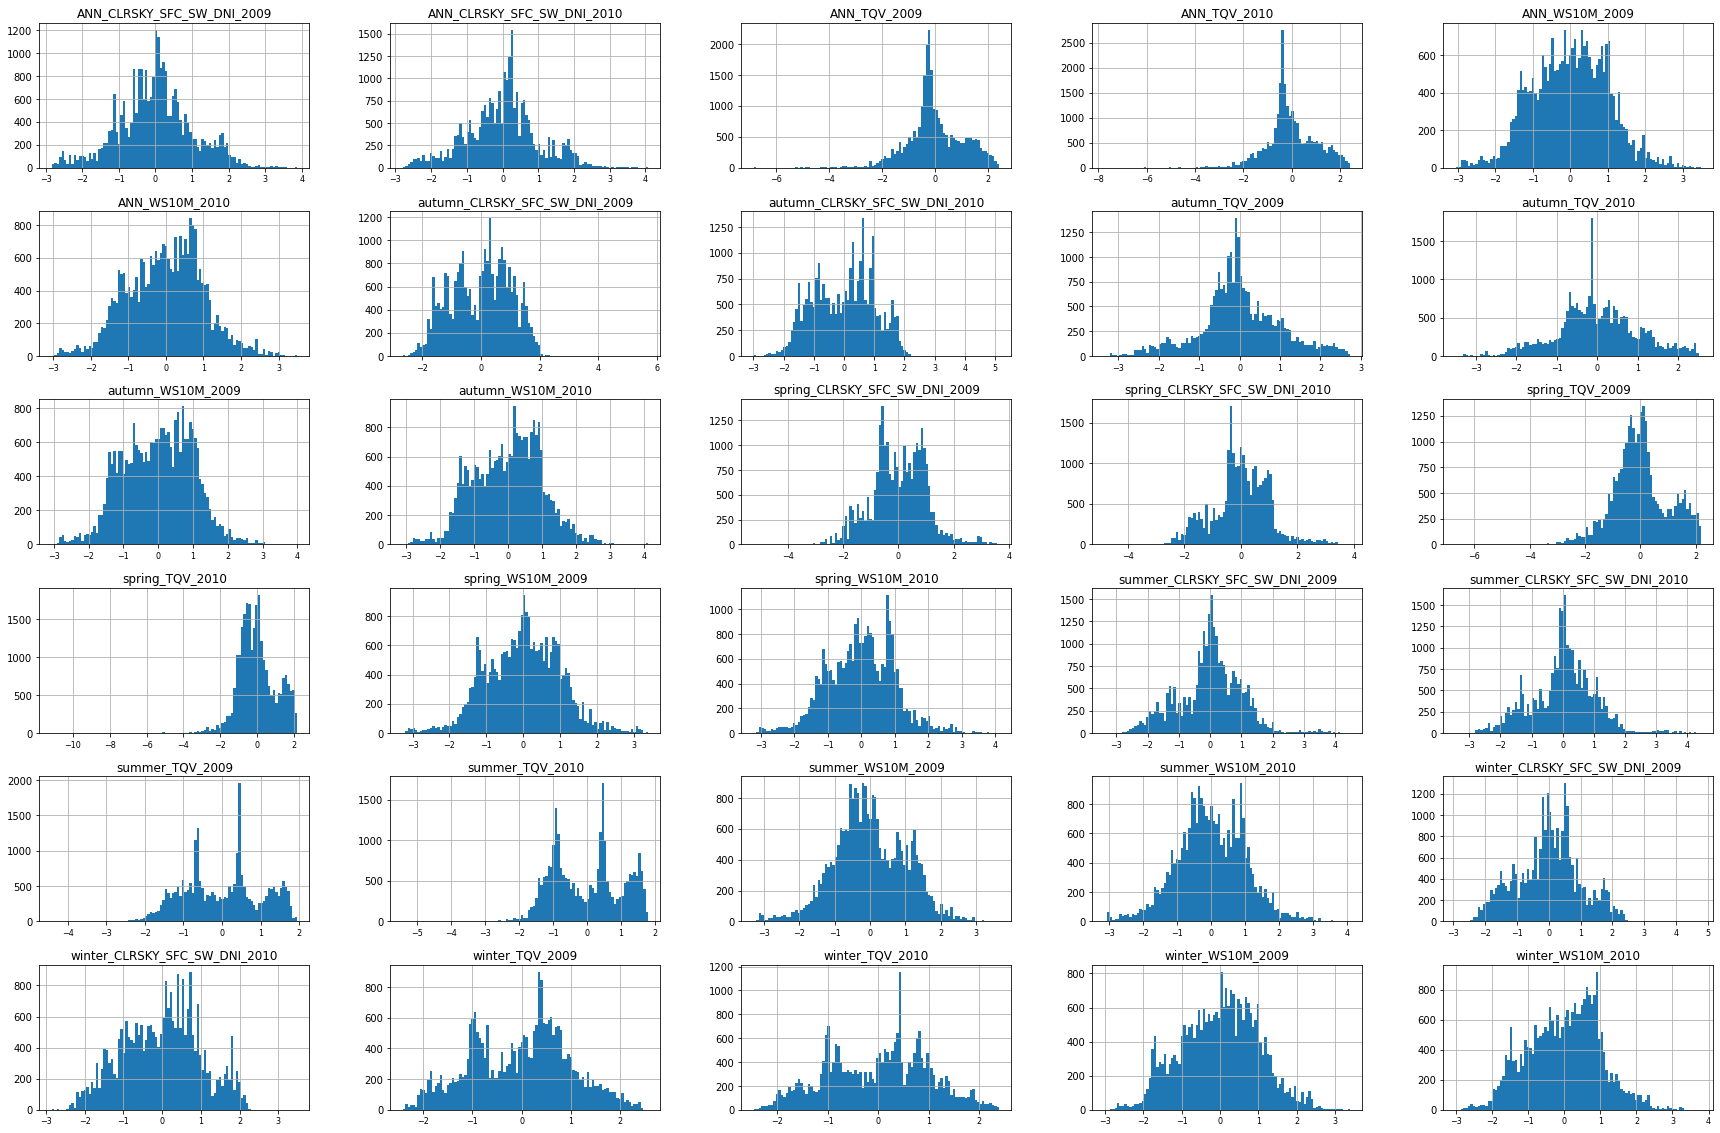

In [94]:
train_X_scaled.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))


array([[<AxesSubplot:title={'center':'ANN_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'ANN_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'ANN_TQV_2009'}>,
        <AxesSubplot:title={'center':'ANN_TQV_2010'}>,
        <AxesSubplot:title={'center':'ANN_WS10M_2009'}>],
       [<AxesSubplot:title={'center':'ANN_WS10M_2010'}>,
        <AxesSubplot:title={'center':'autumn_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'autumn_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'autumn_TQV_2009'}>,
        <AxesSubplot:title={'center':'autumn_TQV_2010'}>],
       [<AxesSubplot:title={'center':'autumn_WS10M_2009'}>,
        <AxesSubplot:title={'center':'autumn_WS10M_2010'}>,
        <AxesSubplot:title={'center':'spring_CLRSKY_SFC_SW_DNI_2009'}>,
        <AxesSubplot:title={'center':'spring_CLRSKY_SFC_SW_DNI_2010'}>,
        <AxesSubplot:title={'center':'spring_TQV_2009'}>],
       [<AxesSubplot:title={'center':'spring_TQV_2010

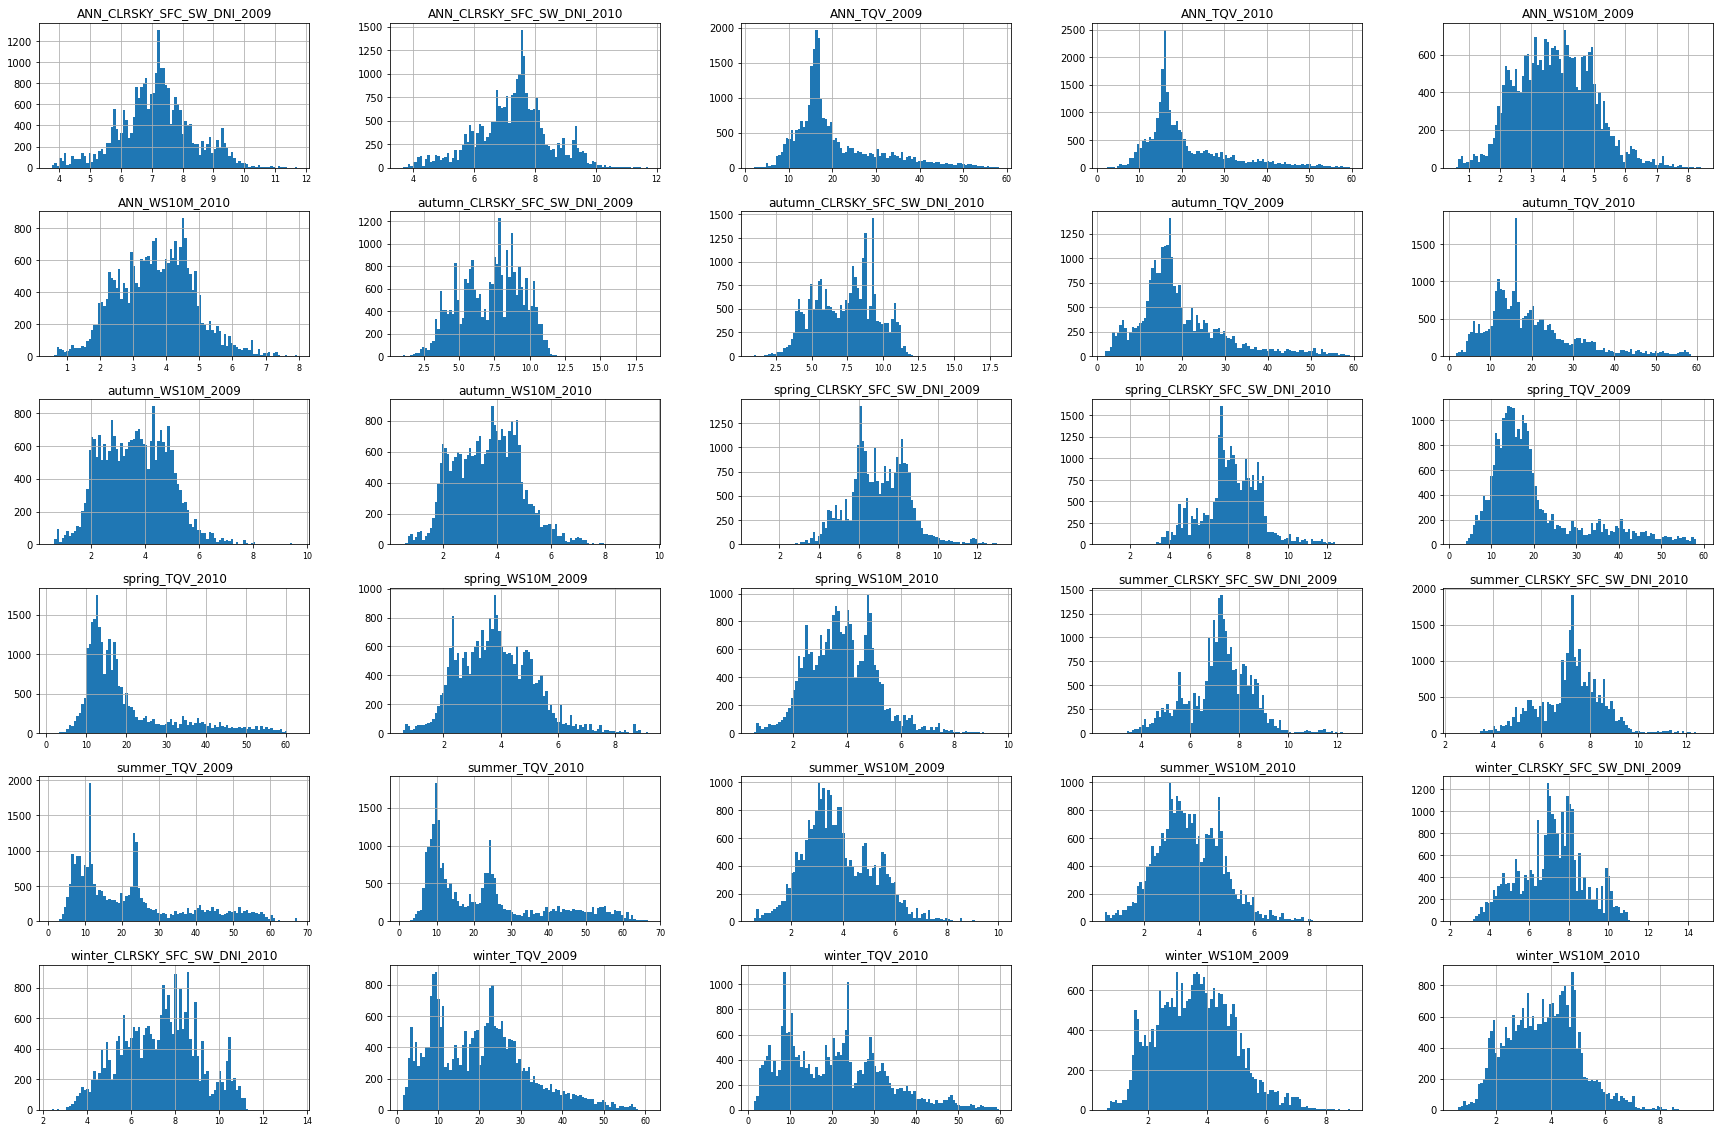

In [95]:
# WITHOUT SCALING OR NORMALIZING
train_X.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))

6


<AxesSubplot:>

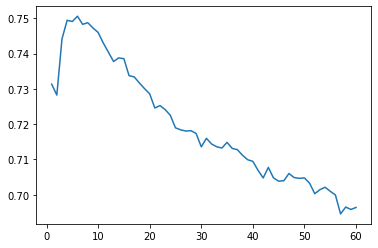

In [98]:
candidate_n_neighbors = np.arange(1,61)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X_scaled, val_X_scaled, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [101]:
knn_model_2 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_2.fit(train_X_scaled, train_y)

KNeighborsClassifier(n_neighbors=6)

In [102]:
knn_model_2.score(val_X_scaled, val_y)

0.75057260650481

In [103]:
y_pred = knn_model_2.predict(val_X_scaled)

<AxesSubplot:>

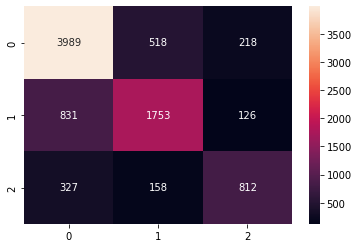

In [104]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# SVM

In [36]:
svm_model_1 = SVC(random_state=22)
svm_model_1.fit(train_X_scaled, train_y)

SVC(random_state=22)

In [37]:
y_pred = svm_model_1.predict(val_X_scaled)

In [46]:
svm_model_1.score(val_X_scaled, val_y)

0.6783096655978011

<AxesSubplot:>

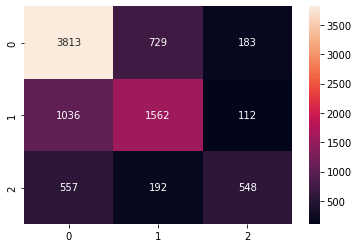

In [45]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [88]:
param_grid = {
                'C': [0.5, 1, 10, 100], # NOTE: values for C must be > 0
                'gamma': ['scale', 1, .1, .01, .001, .0001],
                'kernel': ['rbf'] # Some linear fittings last to 7/8 mins. Not recommended at all
            }
# svm_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
svm_grid = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=5, verbose = 2, n_jobs=4)

In [89]:
svm_grid.fit(train_X_scaled, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  39.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  38.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  41.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.3s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  40.8s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.0min
[CV] END ....................C=1, gamma=scale, k

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.5, 1, 10, 100],
                                        'gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                                  0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [90]:
svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [83]:
svm_model_2 = SVC(C= 10, gamma= 1, random_state=22)
svm_model_2.fit(train_X_scaled, train_y)

SVC(C=10, gamma=1, random_state=22)

In [84]:
y_pred = svm_model_2.predict(val_X_scaled)

In [85]:
svm_model_2.score(val_X_scaled, val_y)

0.7490967482938579

<AxesSubplot:>

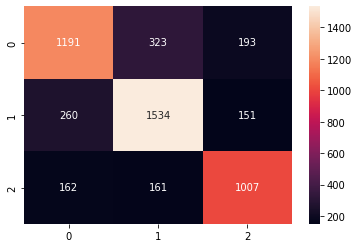

In [86]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')